In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

 Reflect Tables into SQLAlchemy ORM

In [4]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
 # Create our session (link) from Python to the DB
session = Session(engine)

Exploratory Climate Analysis

#### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [26]:
# last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [27]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [84]:
# Perform a query to retrieve the data and precipitation scores
yr_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
#print(yr_data)

In [83]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(yr_data, columns=['date', 'prcp'])
#print(df)

            date  prcp
0     2016-08-24  0.08
1     2016-08-24  2.15
2     2016-08-24  2.28
3     2016-08-24   NaN
4     2016-08-24  1.22
5     2016-08-24  2.15
6     2016-08-24  1.45
7     2016-08-25  0.08
8     2016-08-25  0.08
9     2016-08-25  0.00
10    2016-08-25  0.00
11    2016-08-25  0.21
12    2016-08-25  0.06
13    2016-08-25  0.11
14    2016-08-26  0.00
15    2016-08-26  0.03
16    2016-08-26  0.02
17    2016-08-26  0.04
18    2016-08-26  0.00
19    2016-08-26  0.01
20    2016-08-27  0.00
21    2016-08-27  0.18
22    2016-08-27  0.02
23    2016-08-27  0.00
24    2016-08-27  0.12
25    2016-08-27   NaN
26    2016-08-28  0.01
27    2016-08-28  0.14
28    2016-08-28  0.14
29    2016-08-28  0.14
...          ...   ...
2193  2017-08-16  0.00
2194  2017-08-16  0.07
2195  2017-08-16  0.12
2196  2017-08-16  0.42
2197  2017-08-17  0.00
2198  2017-08-17  0.05
2199  2017-08-17  0.01
2200  2017-08-17  0.13
2201  2017-08-18  0.00
2202  2017-08-18  0.00
2203  2017-08-18  0.06
2204  2017-

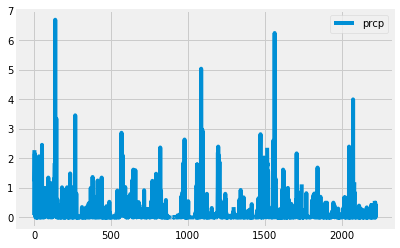

In [62]:
# Use Pandas Plotting with Matplotlib to plot the data
#df = pd.DataFrame(yr_data, columns=['date', 'prcp'])
df.plot()

# Save Figure
plt.savefig("./Images/Prcp_bar.png")


In [87]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#### Design a query to show how many stations are available in this dataset?

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [86]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temps=session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.min(Measurement.tobs).desc()).all()
temps

[('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00519523', 56.0, 85.0, 74.5436493068565),
 ('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00511918', 53.0, 87.0, 71.61596766043456)]

### Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [50]:
# Choose the station with the highest number of temperature observations.
most_obs=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
print(most_obs)

('USC00519281', 2772)


In [51]:
#last data point for station
session.query(Measurement.station, Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()

('USC00519281', '2017-08-18')

In [52]:
# Calculate the date 1 year ago from the last data point in the database
station_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print("Station Query Date: ", station_date)

Station Query Date:  2016-08-18


In [93]:
#collecting data set in a dataframe
st_yr_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-18').\
    order_by(Measurement.date).all()
#print(st_yr_data)
st_df = pd.DataFrame(st_yr_data, columns=['date', 'tobs'])
st_df.head()

,date,tobs
0,2016-08-19,79.0
1,2016-08-20,81.0
2,2016-08-21,79.0
3,2016-08-22,78.0
4,2016-08-23,77.0


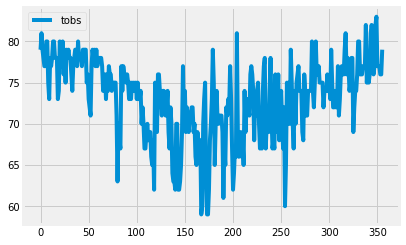

In [94]:
st_df.plot()

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 54., 31.,  9.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

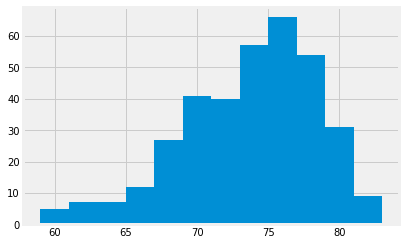

In [95]:
#df in historgram results:
#plt.figure();
st_df = pd.DataFrame(st_yr_data, columns=['date', 'tobs'])
plt.hist(st_df['tobs'], bins=12)





### Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

In [96]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [97]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def trip_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(trip_calc_temps('2017-06-28', '2017-07-05'))

[(74.0, 77.87234042553192, 87.0)]


Text(0, 0.5, 'Average Temp')

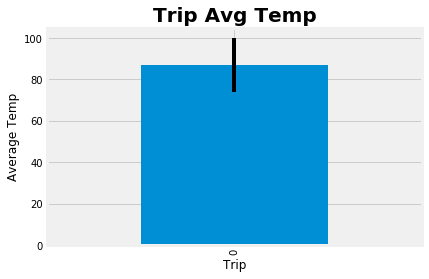

In [113]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


df = pd.DataFrame(trip_calc_temps('2017-06-28', '2017-07-05'), columns=['min', 'avg', 'max'])
#df.head()
error=df["max"]-df["min"]
ax=df["max"].plot(kind="bar", yerr=error)
ax.set_title('Trip Avg Temp',fontsize= 20, fontweight="bold")
ax.set_xlabel("Trip", fontsize=12)
ax.set_ylabel("Average Temp", fontsize=12)

In [115]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Measurement.station, func.count(Measurement.prcp)).\
    filter(Measurement.date between '2017-06-28' and '2017-07-05').\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()



SyntaxError: invalid syntax (<ipython-input-115-dc8618ee7fed>, line 5)

Optional Challenge Assignment

In [ ]:
 # Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [ ]:
 # Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

In [ ]:
<IPython.core.display.Javascript object>